# `pyroomacoustics` demo for microphone directivities

In this IPython notebook, we demonstrate the effect of adding a microphone with directivities using pyroomacoustics:

In [16]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython
from pyroomacoustics.directivities import DirectivityPattern, DirectionVector, CardioidFamily
import pra.experimental.rt60

In [17]:
fs, signal = wavfile.read("arctic_a0001.wav")
print("Original WAV:")
IPython.display.Audio(signal, rate=fs)

Original WAV:


# Creating a 3-D room and add the source

Build a room by specifying corners and height. Add source to the room. <br>
The speech file comes from the [CMU Arctic Database](http://www.festvox.org/cmu_arctic/).

# Add microphone with directivity 

We add microphones with different orientations and look at the effect on output signal

Estimated RT60 : 0.256
2-D plot for azimuth = 0.0 degrees:


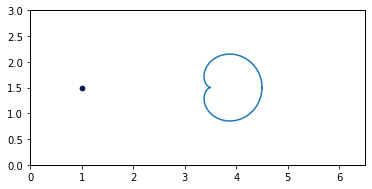

Estimated RT60 : 0.2548125
2-D plot for azimuth = 60.0 degrees:


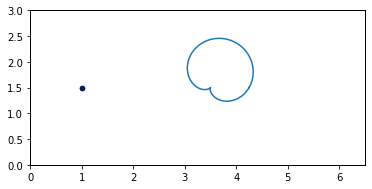

Estimated RT60 : 0.2621875
2-D plot for azimuth = 120.0 degrees:


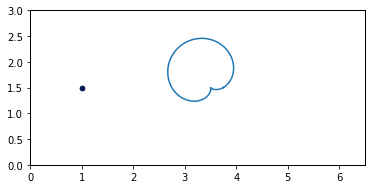

Estimated RT60 : 0.259125
2-D plot for azimuth = 180.0 degrees:


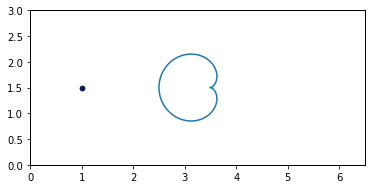

Estimated RT60 : 0.2621875
2-D plot for azimuth = 240.0 degrees:


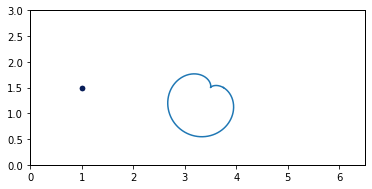

Estimated RT60 : 0.2548125
2-D plot for azimuth = 300.0 degrees:


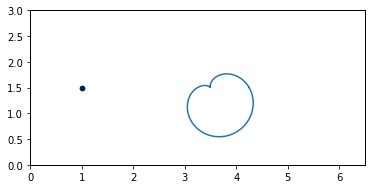

In [21]:
# specify number of cases and directivity pattern
n=6
PATTERN = DirectivityPattern.CARDIOID

olist=[]
for i in range (n): 
    
    # make room by specifying the dimensions
    room  = pra.ShoeBox(
            p = [6.5, 3, 3],
            materials=pra.Material(0.5),
            fs=16000,
            max_order=17,
        )

    # add source signal to the same point as before
    room.add_source([1,1.5,1.5], signal = signal)

    # add microphone (with directivity)
    ORIENTATION = DirectionVector(azimuth=(360*i)/n, colatitude=90, degrees=True)
    directivity = CardioidFamily(orientation=ORIENTATION, pattern_enum=PATTERN)
    
    room.add_microphone([3.5,1.5,1.5], directivity=directivity)
    room.simulate()
    
    est_rt_60 = pra.experimental.rt60.measure_rt60(room.rir[0][0], fs=16000)
    print("Estimated RT60 : {}".format(est_rt_60))
    
    # 2-D plot
    corners = np.array([[0,3], [6.5,3], [6.5,0], [0,0]]).T 
    room_2d = pra.Room.from_corners(corners)
    room_2d.add_source([1,1.5])
    fig_2d, ax_2d = room_2d.plot()

    print("2-D plot for azimuth = {} degrees:".format((360*i)/n))
    azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
    directivity.plot_response(azimuth=azimuth, colatitude=None, degrees=True, ax=ax_2d, offset=[3.5,1.5])
    plt.show()
    
    # output signal
    IPython.display.display(IPython.display.Audio(room.mic_array.signals[0,:], rate=fs))
    olist.append(room.mic_array.signals[0,:])

